## Programmieraufgabe 2  

<span style="color:red; font-weight: bold">Wichtig: Damit alle ben&ouml;tigten Pakete richtig eingebunden werden, f&uuml;hren Sie die n&auml;chste Zelle einmal aus, sobald Sie das Notebook neu &ouml;ffnen.</span>

In [3]:
# some setup
import numpy as np # makes numpy routines and data types available as np.[name ouf routine or data type]
import matplotlib.pyplot as plt # makes plotting command available as plt.[name of command]

from ipywidgets import interactive
import random

## W&uuml;rfeln II

a)  Erzeugen Sie eine Liste mit $n = 100$ Zufallszahlen aus der Menge $\{ 1,2,3,4,5,6 \}$,
und bestimmen Sie, wie oft die Zahl 6 in der Liste vorkommt. 
Welche Verteilung hat die Zufallsvariable $Z(\omega)$, die dieses Zufallsexperiment modelliert?

b)  Wir wiederholen das Experiment nun $m = 1000$ mal. 
Speichern  Sie  in  einer  Liste $z$ die beobachteten (relativen) H&auml;ufigkeiten der Zahl 6 in jeder der $m$ Stichproben von jeweils $n$ Zufallszahlen.

c)  Die  Liste $z$ enth&auml;lt nun  $m$  (pseudozuf&auml;llige)  Realisierungen  der  Werte  der  Zufallsvariablen $Z$. 
Erstellen Sie ein Histogramm von $z$. 
Zeichnen Sie das Histogramm in  ein  Diagramm  zusammen  mit  der  Massenfunktion ($\texttt{scipy.stats.binom.pmf}$)  der  Zufallsvariablen $Z$ 
und vergleichen Sie.

d)  Erstellen Sie mithilfe von $\texttt{interactive}$ ein entsprechendes Histogramm f&uuml;r die ersten
$k$ Werte der Liste $z$, wobei $k$ zwischen 1 und $m$ variiert werden kann. Was beobachten Sie?

In [9]:
import scipy.stats
random.seed("MirkisUsoltsevaLevchenko")

# Fuegen Sie hier Ihre Loesung ein.
z = []
nSixes = 0
for i in range(100):
    temp = random.randint(1, 6)
    z.append(temp)
    if (temp == 6):
        nSixes += 1
print(nSixes)

19


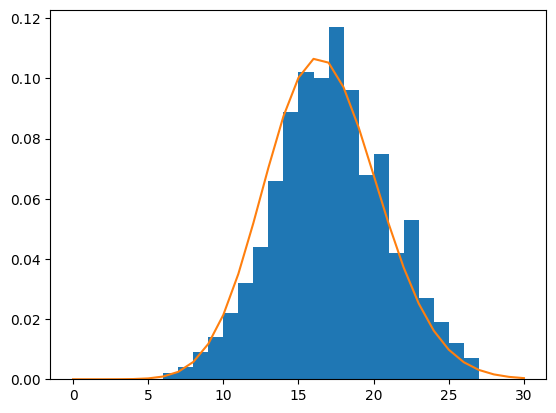

In [10]:
# b) + c)
def get_nSixes_list(nThrows, nTrials):
    nSixes = np.zeros(nTrials)
    
    for i in range(nTrials):
        for j in range(nThrows):
            if random.randint(1, 6) == 6:
                nSixes[i] += 1
        
    return nSixes

n = 100
m = 1000
z = get_nSixes_list(n, m)
right_border = z.max() + 5

counts, edges = np.histogram(z, np.arange(0, right_border, 1), density=True)
plt.stairs(counts, edges, fill=True)
plt.plot(scipy.stats.binom.pmf(np.arange(0, right_border, 1), n, 1/6))
plt.show()

In [11]:
# d)you can also change nThrows
def plot_distribution(nTrials, nThrows):
    nSixes_list = get_nSixes_list(nThrows, nTrials)
    right_border = nSixes_list.max() + 5

    counts, edges = np.histogram(nSixes_list, np.arange(0, right_border, 1), density=True)
    plt.stairs(counts, edges, fill=True)
    plt.plot(scipy.stats.binom.pmf(np.arange(0, right_border, 1), nThrows, 1/6))
    plt.show()

n = 100
m = 1000
interactive(plot_distribution, nThrows=(n//2, 2*n, n//2), nTrials = (1, m, 1))

interactive(children=(IntSlider(value=500, description='nTrials', max=1000, min=1), IntSlider(value=100, descr…